<a href="https://colab.research.google.com/github/juasalazarmo/Se-ales_Sistemas/blob/main/PARCIAL(1)_SyS_Jonathan_Marcelo_Giraldo_Orozco_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parcial 1: Señales y Sistemas 2024-II

Profesor: Andrés Marino Álvarez Meza, Ph.D.
Departamento de Ingeniería Eléctrica, Electrónica, y Computación
Universidad Nacional de Colombia - sede Manizales

Estudiante: Jonathan Marcelo Giraldo Orozco

Pregunta 1 (valor 2.5 puntos)

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de  5kHz , entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua  x(t)=0.3cos(1000πt−π/4)+0.6sin(2000πt)+0.1cos(11000πt−π) ?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal  x(t) .

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

x(t)=0.3cos(1000πt−π/4)+0.6sin(2000πt)+0.1cos(11000πt−π)

<ipython-input-1-a5ebc37a2822>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(y1[i].reshape(-1,1),ve))]#Se calcula la distancia desde cada punto al vector de estados


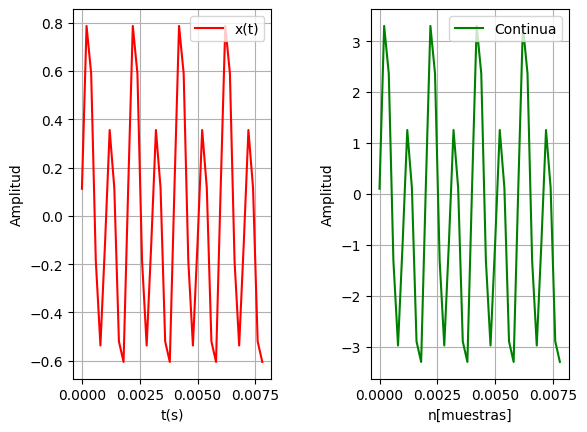

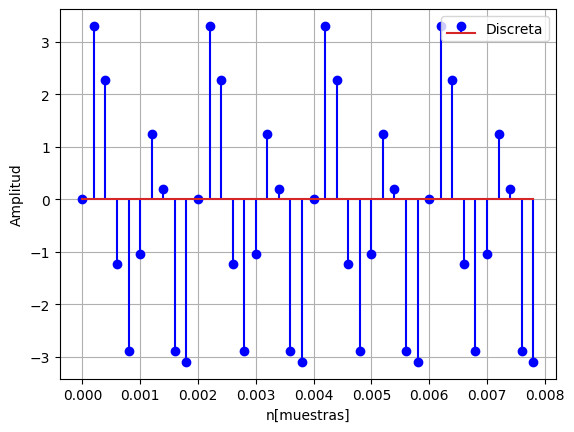

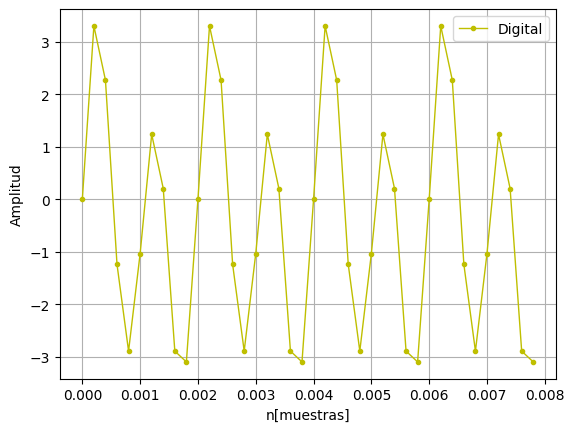

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def ceropen(x,xmax,xmin):
  m = (xmax-xmin)/(x.max()-x.min())
  b = xmax-(m*x.max())
  y = (m*x)+b
  return (y)

A1 = 0.3                                              #Amplitud 1
A2 = 0.6                                              #Amplitud 2
A3 = 0.1                                              #Amplitud 3
f1 = 500                                              #Frec. 1
f2 = 1000                                             #Frec. 2
f3 = 5500                                             #Frec. 1
Fs = 5000                                             #Frec. de muestreo
T = 1/500                                             #Periodo de la señal (cuasiperiódica)
Ts =  1/Fs                                            #Periodo de muestreo
t = np.arange(0, 4*T, Ts)                             #Vector de tiempo; Se muestran 4 periodos

x = A1*np.cos((1000*np.pi*t)-(np.pi/4)) + A2*np.sin(2000*np.pi*t) + A3*np.cos((11000*np.pi*t)-(np.pi)) #x(t)

y1max = -3.3                                          #mínimo de la entrada analóga
y1min = 3.3                                           #máximo de la entrada analóga
y1 = ceropen(x,y1min,y1max).reshape(-1,1)             #Cero y pendiente de y1min a y1max(Entrada análoga deseada); .reshape para asegurar el vector columna

nb = 5                                                #Número de bits
ne = 2**nb                                            #Número de estados
res= (y1max-y1min)/ne                                 #Resolución Cuantización
ve =np.arange(y1min,y1max,res).reshape(-1,1)          #Vector de estados; .reshape para asegurar el vector columna
xq = np.zeros(len(y1))                                #Señal cuantizada
for i in range(len(y1)):                              #Recorrer señal cero y pendiente
  xq[i] = ve[np.argmin(cdist(y1[i].reshape(-1,1),ve))]#Se calcula la distancia desde cada punto al vector de estados

def my_cuantizador(yn, vq) :                          #yn punto a cuantizar, vq vector de estados
  Ne = vq.shape[0]                                    #Tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))       #Distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn)                                 #Posición distancia mínima
  return vq[ind]

for i in range(xq.shape[0]):                          #Recorrer vector cero y spam discretizado para cuantizar
   if i==0:                                           #primera muestra
     yq = my_cuantizador(xq[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(xq[i],ve))      #Apilar datos cuantizando si i>0

#GRAFICAR SEÑALES
plt.subplot(1,2,1)
plt.plot(t,x,'r',label='x(t)')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(t,y1,'g',label='Continua')
plt.xlabel('n[muestras]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.subplots_adjust(hspace=0.5,wspace=0.5)                #Espacio entre gráficas
plt.show()

plt.stem(t,xq,'b',label='Discreta')
plt.xlabel('n[muestras]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

plt.plot(t,yq,c='y',marker='.',label='Digital', linewidth=1)
plt.xlabel('n[muestras]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

#Para estar seguros de tener Fs adecuada y  mostrar al usuario una respuesta,
#es necesario implementar el siguiente código en la línea donde definimos Fs

Fs = float(input(f'Defina Fs >= {10*f3} = '))           #Frec. de muestreo
while( Fs < 10*f3):
  print('Fs no es adecuada')
  Fs = float(input(f'Defina Fs >= {2*f3} '))
print('Frecuencia de muestreo adecuada')

Pregunta 2 (valor 2.5 puntos)

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

x[n]=sin[100πn]+sin[600πn]

--2024-12-06 00:53:01--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 209.85.200.138, 209.85.200.100, 209.85.200.139, ...
Connecting to docs.google.com (docs.google.com)|209.85.200.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-06 00:53:01--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.201.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    in 0s

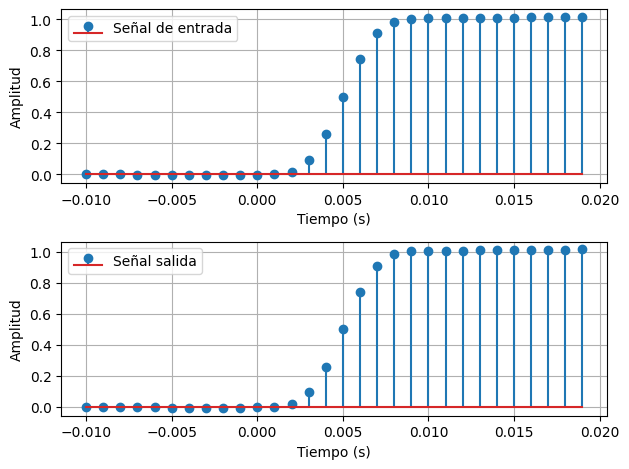

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.020, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside

#ADITIVIDAD se cumple
x1 = t     #x1 = np.sin(np.pi*t) #  x1=np.cos(np.pi*t)
x2 = np.heaviside(t,1)           #Señal 2
y1 = my_system.predict(x1)       #Salida señal 1
y2 = my_system.predict(x2)       #Salida señal 2
xsum= (x1+x2)
ysum= (y1+y2)
y_u = my_system.predict(xsum)     #Salida (x1 +x2)
# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t,y_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,ysum, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

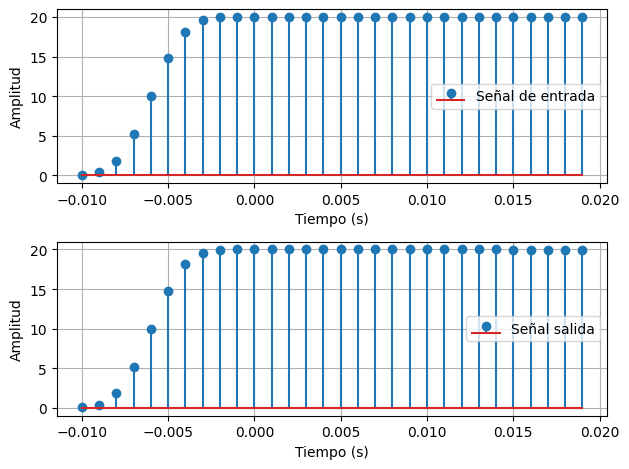

In [ ]:
#HOMOGENEIDAD se cumple

k = 2
x = 10*np.cos(np.pi*t)
y = my_system.predict(x)
ys = k*y
# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, k*y, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,ys, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

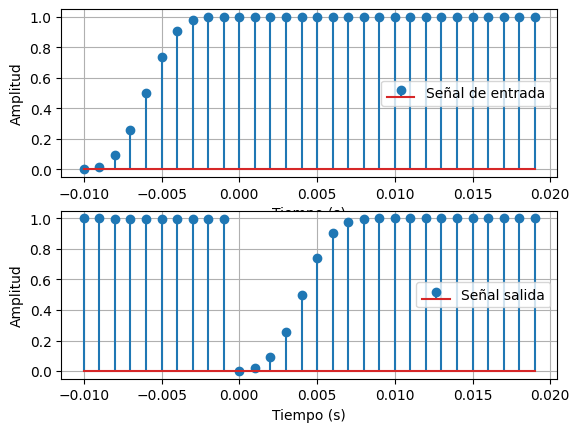

In [ ]:
#DEZPLAZAMIENTO TEMPORAL se cumple

des = 10                           #desplazamiento temporal
s1 = np.cos(2*np.pi*t)             #señal de entrada para la invarianza en el tiempo
h1 = my_system.predict(s1)         #salida del sistema para esa entrada
s_desplazado = np.roll(s1,des)     #desplazar la entrada
h_desplazado = my_system.predict(s_desplazado)
t_desplazado = np.roll(h1,des)     #desplazar el tiempo
# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, h1, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,t_desplazado, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()

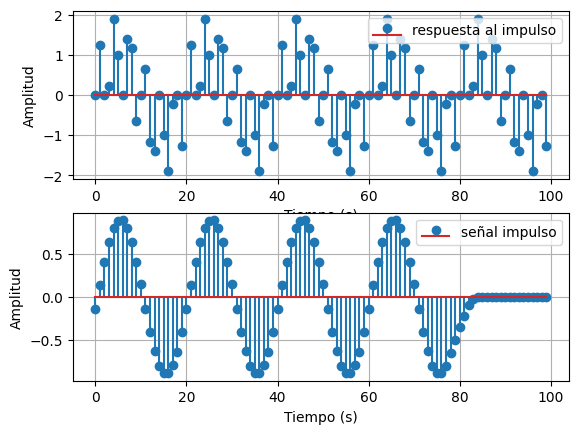

In [ ]:
N = 50
n = np.arange(0,100)
# Crear la señal impulso (delta de Dirac)
impulse = np.zeros(N)
impulse[0] = 1  # Asumimos el impulso en el centro de t

# Aplicar la señal impulso al sistema para obtener la respuesta al impulso
h = my_system.predict(impulse)
sig = np.sin(100*np.pi*n/fs) + np.sin(600*np.pi*n/fs)

jc = np.convolve(sig,h, mode='same')

# Graficar la respuesta al impulso
fig, axs = plt.subplots(2,1)
axs[0].stem(n, sig, label='respuesta al impulso')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(n, jc, label='señal impulso')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()